# ChatGPT Playbook

<p>
Mal Minhas, v1.0<br>
01.03.23
</p>

## 1. Installation

This notebook leverages a the newly announced ChatGPT API which you can find out more about in the OpenAI release announcement [here](https://openai.com/blog/introducing-chatgpt-and-whisper-apis).

In order to use ChatGPT API you will need OpenAI API access.  For that you will need both an API key and an Organization ID for authentication.  You can obtain an API key from your [API Keys page](https://beta.openai.com/account/api-keys).  Organization IDs can be found on your [Organization settings](https://beta.openai.com/account/org-settings) page. The module assumes your API key and Organization ID have been stored in two respective environment variables `OPENAI_API_KEY` and `OPENAI_ORG_ID`.

In [1]:
import os

def configureEnvVars(key, org_id):
    # NB: host url is not prepended with \"https\" nor does it have a trailing slash.
    os.environ['OPENAI_API_KEY'] = key
    os.environ['OPENAI_ORG_ID'] = org_id

def getOrganisationId(file):
    with open(file) as f:
        key = f.read()
    return key
    
def getAPIKey(file):
    with open(file) as f:
        key = f.read()
    return key

configureEnvVars(getAPIKey('.openAIKey'),getOrganisationId('.openAIOrg'))

In [2]:
import os
import openai

openai.organization = os.getenv("OPENAI_ORG_ID")
openai.api_key = os.getenv("OPENAI_API_KEY")
models = openai.Model.list()
names = []
for model in models.data:
    names.append(model.get('id'))
print(names)

['davinci', 'text-davinci-001', 'text-search-curie-query-001', 'gpt-3.5-turbo', 'babbage', 'text-babbage-001', 'curie-instruct-beta', 'davinci-similarity', 'code-davinci-edit-001', 'text-similarity-curie-001', 'ada-code-search-text', 'gpt-3.5-turbo-0613', 'text-search-ada-query-001', 'gpt-3.5-turbo-16k-0613', 'gpt-4-0314', 'babbage-search-query', 'ada-similarity', 'text-curie-001', 'gpt-4', 'gpt-3.5-turbo-16k', 'text-search-ada-doc-001', 'text-search-babbage-query-001', 'code-search-ada-code-001', 'curie-search-document', 'davinci-002', 'text-search-davinci-query-001', 'text-search-curie-doc-001', 'babbage-search-document', 'babbage-002', 'babbage-code-search-text', 'text-embedding-ada-002', 'davinci-instruct-beta', 'davinci-search-query', 'text-similarity-babbage-001', 'text-davinci-002', 'code-search-babbage-text-001', 'text-davinci-003', 'text-search-davinci-doc-001', 'code-search-ada-text-001', 'ada-search-query', 'text-similarity-ada-001', 'gpt-4-0613', 'ada-code-search-code', 'wh

Note the presence of `gpt-3.5`.  This is the model for ChatGPT per the OpenAI release announcement [here](https://openai.com/blog/introducing-chatgpt-and-whisper-apis):

In [3]:
[name for name in names if name.find('gpt') == 0]

['gpt-3.5-turbo',
 'gpt-3.5-turbo-0613',
 'gpt-3.5-turbo-16k-0613',
 'gpt-4-0314',
 'gpt-4',
 'gpt-3.5-turbo-16k',
 'gpt-4-0613',
 'gpt-3.5-turbo-0301']

## 2. Usage

Here's the most basic invocation of the API:

In [4]:
completion = openai.ChatCompletion.create(
  model="gpt-3.5-turbo", 
  messages=[{"role": "user", "content": "Tell the world about the ChatGPT API in the style of a pirate."}],
  temperature=0.7
)

Let's see what a `completion` instance is and then print it out:

In [5]:
print(type(completion))
print(dir(completion))

<class 'openai.openai_object.OpenAIObject'>
['__class__', '__class_getitem__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__ior__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__or__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__ror__', '__setattr__', '__setitem__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_previous', '_response_ms', '_retrieve_params', 'api_base', 'api_base_override', 'api_key', 'api_type', 'api_version', 'arequest', 'clear', 'construct_from', 'copy', 'engine', 'fromkeys', 'get', 'items', 'keys', 'openai_id', 'organization', 'pop', 'popitem', 'refresh_from', 'request', 'response_ms', 'setdefault', 'to_dict', 'to_dict_recursive', 'typed_api_type', 'update', 'values']


Let's dump `to_dict()`:

In [6]:
completion

<OpenAIObject chat.completion id=chatcmpl-7sVXMVJAZhe4FsmWVLJjX9dNwGxuC at 0x110333f90> JSON: {
  "id": "chatcmpl-7sVXMVJAZhe4FsmWVLJjX9dNwGxuC",
  "object": "chat.completion",
  "created": 1693225296,
  "model": "gpt-3.5-turbo-0613",
  "choices": [
    {
      "index": 0,
      "message": {
        "role": "assistant",
        "content": "Arr, me hearties! Gather 'round and listen to me tale of the ChatGPT API, a treasure trove of linguistic prowess that be sure to shiver yer timbers!\n\nAvast ye, for the ChatGPT API be a powerful tool that lets ye integrate the might of OpenAI's language model into yer own applications, websites, or software. With a few strokes o' yer keyboard, ye can unleash the power of ChatGPT, the most advanced text-based conversational AI, upon the seven seas of the internet!\n\nPicture this, me hearties: ye be havin' a website or an app, and ye want to imbue it with the gift of gab. Fear not, for the ChatGPT API be yer trusty first mate in this endeavor! Whethe

We can see the output is in the `content` field.  Let's write some utility functions to render code output in Markdown:

In [7]:
from IPython.display import display, Markdown

def renderMe(text):
    display(Markdown(text))

def completeMe(text):
    completion = openai.ChatCompletion.create(
      model = 'gpt-3.5-turbo', 
      messages = [{'role': 'user', 'content': text}]
    )
    return completion.get('choices')[0].get('message').get('content')

In [8]:
renderMe(completeMe("Write and execute Python code to draw a Mandelbrot set using matplotlib."))

Sure! Here's the Python code to draw a Mandelbrot set using matplotlib:

```python
import numpy as np
import matplotlib.pyplot as plt

def mandelbrot(c, max_iter):
    z = c
    for n in range(max_iter):
        if abs(z) > 2:      
            return n
        z = z*z + c
    return max_iter

def create_fractal(min_x, max_x, min_y, max_y, image, max_iter):
    height = image.shape[0]
    width = image.shape[1]
    
    pixel_size_x = (max_x - min_x) / width
    pixel_size_y = (max_y - min_y) / height
    
    for x in range(width):
        for y in range(height):
            real = min_x + x * pixel_size_x
            imag = min_y + y * pixel_size_y
            c = complex(real, imag)
            
            color = mandelbrot(c, max_iter)
            image[y, x] = color

# Set the desired size and resolution of the image
width, height = 800, 800
dpi = 100
image = np.zeros((height, width))

# Set the boundary and maximum number of iterations
min_x, max_x = -2.0, 1.0
min_y, max_y = -1.5, 1.5
max_iter = 1000

# Generate the fractal
create_fractal(min_x, max_x, min_y, max_y, image, max_iter)

# Plot the fractal
plt.figure(figsize=(width / dpi, height / dpi), dpi=dpi)
plt.imshow(image, cmap='hot', extent=[min_x, max_x, min_y, max_y])
plt.title('Mandelbrot Set')
plt.xlabel('Re')
plt.ylabel('Im')
plt.show()
```

To execute the code, simply copy and paste it into a Python environment (e.g., Jupyter Notebook) and run the cells. You will see the Mandelbrot set being displayed using matplotlib.

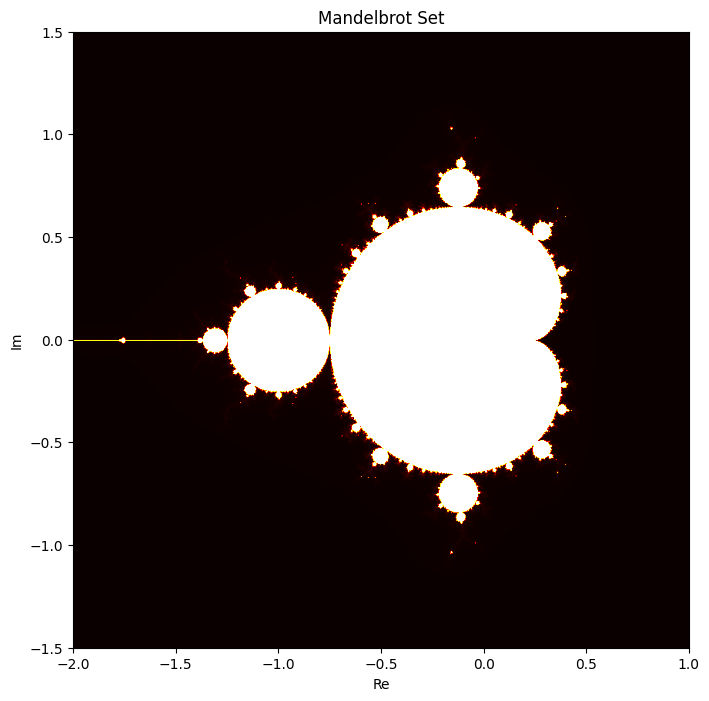

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def mandelbrot(c, max_iter):
    z = c
    for n in range(max_iter):
        if abs(z) > 2:      
            return n
        z = z*z + c
    return max_iter

def create_fractal(min_x, max_x, min_y, max_y, image, max_iter):
    height = image.shape[0]
    width = image.shape[1]
    
    pixel_size_x = (max_x - min_x) / width
    pixel_size_y = (max_y - min_y) / height
    
    for x in range(width):
        for y in range(height):
            real = min_x + x * pixel_size_x
            imag = min_y + y * pixel_size_y
            c = complex(real, imag)
            
            color = mandelbrot(c, max_iter)
            image[y, x] = color

# Set the desired size and resolution of the image
width, height = 800, 800
dpi = 100
image = np.zeros((height, width))

# Set the boundary and maximum number of iterations
min_x, max_x = -2.0, 1.0
min_y, max_y = -1.5, 1.5
max_iter = 1000

# Generate the fractal
create_fractal(min_x, max_x, min_y, max_y, image, max_iter)

# Plot the fractal
plt.figure(figsize=(width / dpi, height / dpi), dpi=dpi)
plt.imshow(image, cmap='hot', extent=[min_x, max_x, min_y, max_y])
plt.title('Mandelbrot Set')
plt.xlabel('Re')
plt.ylabel('Im')
plt.show()